# **Predicting Health Insurance Price for an individual or family**


#**Business Problem**


Health insurance companies need to decide how much to charge people for their insurance plans. But everyone is different—some are older, some smoke, some have kids—so it's hard to set the right price for everyone. If companies can better understand what factors (like age, BMI, smoking) affect insurance costs, they can:                                                    
1.Set fair and personalized prices for each person or family      
2.Make customers happier by being clear about how prices are decided                                                          
3.Create health programs to help people stay healthier and reduce future costs


# **Objective:**
Build a classification model to predict the prices of health insurance for an individual or family.


# **Business benifits:**       
1.By identifying high-risk individuals early, the company can adjust pricing or offer health plans that reduce financial losses overtime.                      
2.When prices feel fair and are easy to explain, customers are more likely to trust the company and stay with it longer.


# **Target Variable:**      
**.** Health_insurance_price


# **Input Variable:**
User Demographics: Age, Gender,Smoking_status,Location             
Activity data: BMI,Children

# **1.Data Understanding:**

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
# Load the datacsv")
df=pd.read_csv("/content/4021579-Health_insurance_cost.csv")
df

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head()
df.shape

(1338, 7)

In [54]:
# Dataset information
print("Dataset information:")
df.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [5]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64


In [6]:
# Summary statistics for numerical data
print("\nSummary statistics:")
df.describe()


Summary statistics:


,age,BMI,Children,health_insurance_price
count,1310.000000,1315.000000,1338.000000,1336.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,14.055378,6.110302,1.205493,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.210000,0.000000,4744.325050
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.580000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# Summary statistics for categorical columns
print("\nCategorical Feature Summary:")
print(df.describe(include=['object']))


Categorical Feature Summary:
       gender smoking_status   location
count    1338           1338       1338
unique      2              2          4
top      male             no  southeast
freq      676           1064        364


.

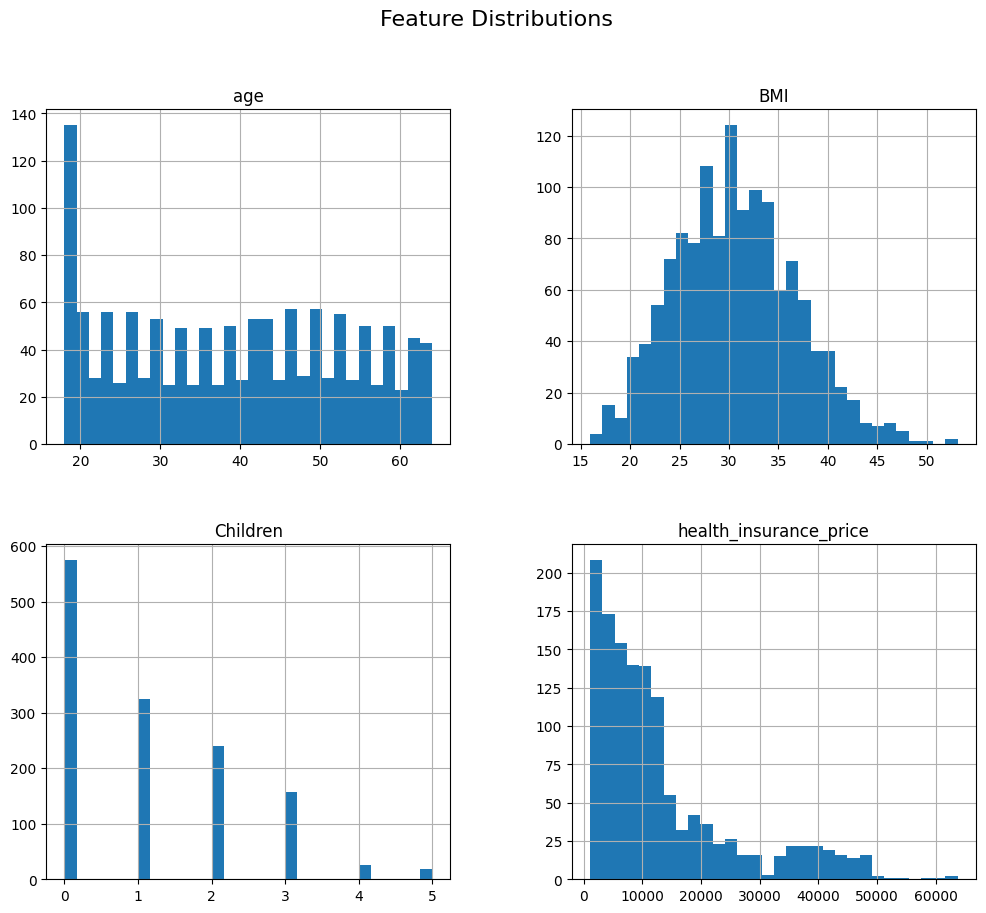

In [8]:
# Histogram for numerical columns
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

<ipython-input-9-c3fcc68602ab>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
<ipython-input-9-c3fcc68602ab>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
<ipython-input-9-c3fcc68602ab>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


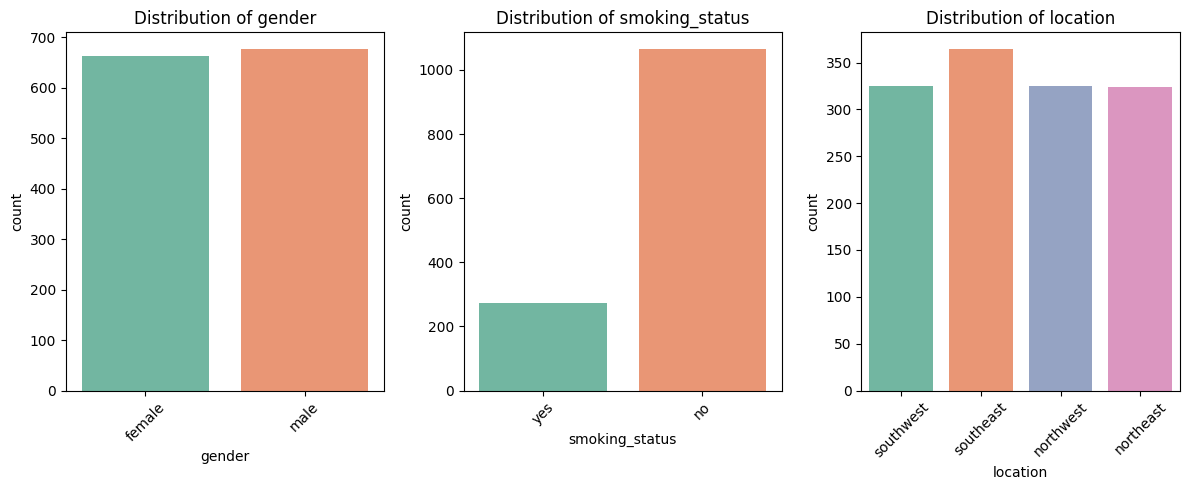

In [9]:
# Countplot for categorical variables
categorical_features = ["gender", "smoking_status","location"]
plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

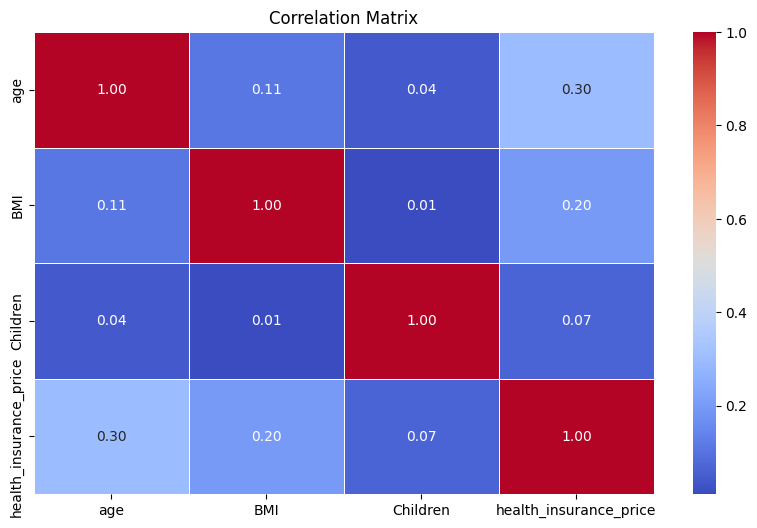

In [10]:
# Correlation matrix (only for numerical features)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# **2. Data Preprocessing**

## **- Handling Duplicates**

In [55]:
# Check for duplicate values
duplicate_count=df.duplicated().sum()
print("Number of duplicate rows:",duplicate_count)

#Remove duplicates rows if data contains duplicate rows
df=df.drop_duplicates()
df

# No of rows and colums after removing duplicates
print(f"New dataset shape after removing duplicates: {df.shape}")

Number of duplicate rows: 1
New dataset shape after removing duplicates: (1337, 7)


### **- Handling Missing Values(Null values) :**Using Imputation Techniques


In [56]:
# Check if any missing values present before imoutation
print("Missing values:")
print(df.isnull().sum())

Missing values:
age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64


In [57]:
# Creating separate copies for different imputation techniques
df_mean = df.copy()
df_mode = df.copy()
df_median = df.copy()
df_interpolation = df.copy()
df_ffill = df.copy()
df_bfill = df.copy()

### 1. Mean Imputation Technique:

In [58]:
# Mean imputation technique
df_mean["age"] = df_mean["age"].fillna(df_mean["age"].mean())
df_mean["BMI"] = df_mean["BMI"].fillna(df_mean["BMI"].mean())
df_mean["health_insurance_price"] = df_mean["health_insurance_price"].fillna(df_mean["health_insurance_price"].mean())

# Display missing values after mean imputation
print("\nMissing values after Mean Imputation:")
print(df_mean.isnull().sum())


Missing values after Mean Imputation:
age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64


2. Median Imputation Technique:

In [59]:
# Median imputation technique
df_median['age'] = df_median['age'].fillna(df_median['age'].median())
df_median['BMI'] = df_median['BMI'].fillna(df_median['BMI'].median())
df_median['health_insurance_price'] = df_median['health_insurance_price'].fillna(df_median['health_insurance_price'].median())

# Display missing values after median imputation
print("Missing values after imputation:")
print(df_median.isnull().sum())


Missing values after imputation:
age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64


4. Interpolation Technique:

In [60]:
# Interpolation (Fills missing values using linear interpolation)
df_interpolation["age"] = df_interpolation["age"].interpolate(method="linear")
df_interpolation["gender"] = df_interpolation["gender"].interpolate(method="linear")
df_interpolation["health_insurance_price"] = df_interpolation["health_insurance_price"].interpolate(method="linear")

print("\nMissing values after Interpolation:")
print(df_interpolation.isnull().sum())


Missing values after Interpolation:
age                        0
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     0
dtype: int64


<ipython-input-60-4698db0c8f1f>:3: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolation["gender"] = df_interpolation["gender"].interpolate(method="linear")


In [19]:
# Ffill imputation technique
df[['age', 'BMI', 'health_insurance_price']] = df[['age', 'BMI', 'health_insurance_price']].ffill()

# Display missing values after Ffill imputation
print("\nMissing values after Ffill Imputation:")
print(df.isnull().sum())



Missing values after Ffill Imputation:
age                       0
gender                    0
BMI                       1
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64


<ipython-input-19-25ed4ce15786>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['age', 'BMI', 'health_insurance_price']] = df[['age', 'BMI', 'health_insurance_price']].ffill()


In [20]:
# Bfill imputation technique
columns_to_fill=['age','BMI','health_insurance_price']
df_bfill[columns_to_fill]=df_bfill[columns_to_fill].bfill()

# Display missing values after Bfill technique
print("\nMissing values after Bfill Imputation:")
print(df_bfill.isnull().sum())
print("\nAll the records of table after replacing null values:")
df_bfill


Missing values after Bfill Imputation:
age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

All the records of table after replacing null values:


,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,33.770,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


# **- Handling of the outliers**

### Removing outliers using Interquartile Range(IQR)

In [61]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# IQR Method
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

lower_bound= Q1 - 1.5 * IQR
upper_bound= Q3 + 1.5 * IQR

# Finding outliers
outliers_iqr = ((numeric_df < lower_bound) | (numeric_df > upper_bound)).sum()
print("\nOutliers detected using IQR method:\n", outliers_iqr)


Outliers detected using IQR method:
 age                         0
BMI                         9
Children                    0
health_insurance_price    141
dtype: int64


In [22]:
# Identify outliers
outliers_iqr = ((numeric_df < lower_bound) | (numeric_df > upper_bound))

# Filter out outliers
df_cleaned = df[outliers_iqr.any(axis=1)]

print("Original Data Shape:", df.shape)
print("After removing outliers using IQR:", df_cleaned.shape)

Original Data Shape: (1337, 7)
After removing outliers using IQR: (147, 7)


### Removing outliers using Z_Score

In [23]:
from scipy.stats import zscore
import numpy as np

# Select numerical columns
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))

# Keep only data points where Z-score is within ±3
df_z = df[(z_scores < 3).all(axis=1)]

print("Original Data Shape:", df.shape)
print("After Z-Score Outlier Removal:", df_z.shape)

Original Data Shape: (1337, 7)
After Z-Score Outlier Removal: (0, 7)


In [24]:
print((z_scores > 3).sum(axis=0))  # Outliers per column
print((z_scores > 3).any(axis=1).sum(), "rows identifies as outliers")


[ 0  0 18  8]
26 rows identifies as outliers


## **Removing outliers using Winsorization**

In [62]:
from scipy.stats.mstats import winsorize # import winzsorize

df_winsor = df.copy()

# Select only numerical columns
numerical_col=df.select_dtypes(include=['number']).columns
# Applying winzorization (capping extreme values at 5% and 95%)
for col in numerical_col:
    df_winsor[col] = winsorize(df[col], limits=[0.05, 0.05])

print("Original Data Shape:", df.shape)
print("After Winsorization :", df_winsor.shape)

Original Data Shape: (1337, 7)
After Winsorization : (1337, 7)


# **Feature Scaling**

In [63]:
# import packages from sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# creating copies of dataset for each scaling method
df_standard=df.copy()
df_minmax=df.copy()
df_robust=df.copy()

# Select numerical columns for scaling
num_col=df.select_dtypes(include=['number']).columns

#1.Standard Scaler:

In [64]:
# Standard Scaling (Mean=0, Std=1)
standard_scaler=StandardScaler()
df_standard[num_col]=standard_scaler.fit_transform(df_standard[num_col])
df_standard[num_col].shape

(1337, 4)

# 2.MinMax Scaler:


In [65]:
# MinMax Scaler (0 to 1 range)
minmax_scaler=MinMaxScaler()
df_minmax[num_col]=minmax_scaler.fit_transform(df_minmax[num_col])
df_minmax[num_col].shape

(1337, 4)

# 3.Robust Scaler:

In [66]:
# Robust Scaling (Uses Meadian and IQR)
robust_scaler=RobustScaler()
df_robust[num_col]=robust_scaler.fit_transform(df_robust[num_col])
df_robust.shape

(1337, 7)

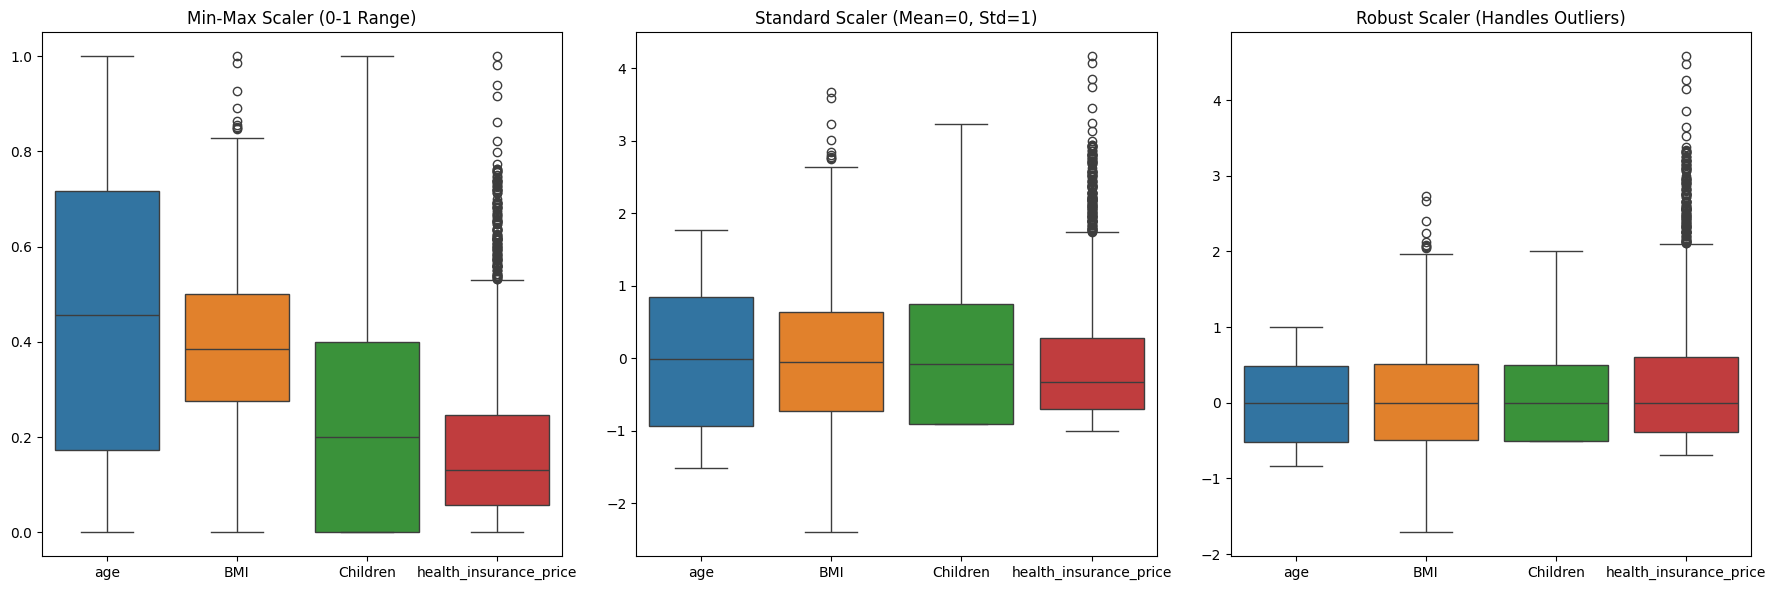

In [67]:
# Showing visual differences between scalers

import matplotlib.pyplot as plt # imported matplot library
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6))


# Min-Max Scaler
sns.boxplot(data=df_minmax, ax=axes[0])
axes[0].set_title("Min-Max Scaler (0-1 Range)")


# Standard Scaler
sns.boxplot(data=df_standard, ax=axes[1])
axes[1].set_title("Standard Scaler (Mean=0, Std=1)")

# Robust Scaler
sns.boxplot(data=df_robust, ax=axes[2])
axes[2].set_title("Robust Scaler (Handles Outliers)")

plt.tight_layout()
plt.show()



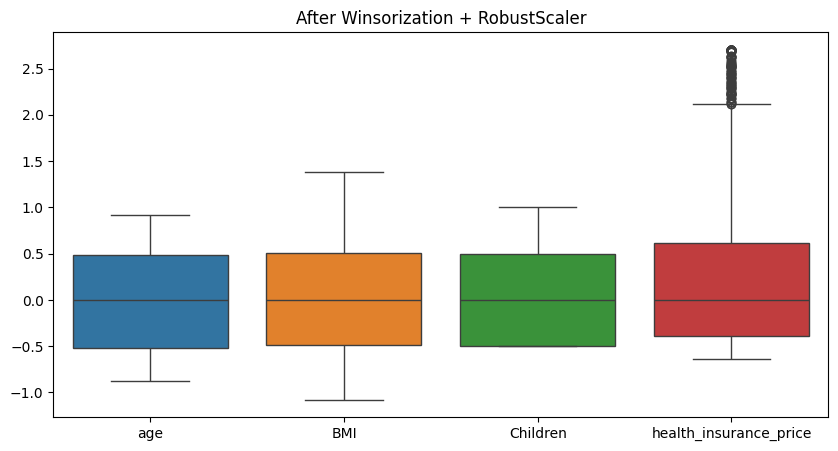

In [68]:
# Apply RobustScaler (or any other)
scaler =  RobustScaler()
num_cols = df_winsor.select_dtypes(include=['number']).columns
df_winsor[num_cols] = scaler.fit_transform(df_winsor[num_cols])

#Plot boxplot to confirm
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_winsor)
plt.title("After Winsorization + RobustScaler")
plt.show()

# **-Encoding**

In [69]:
# import labelEncoder and OneHotEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Create copies of dataset for Encoding
df_label=df.copy()
df_onehot=df.copy()

# Select categorical columns
cat_col=df.select_dtypes(include=['object']).columns

### 1.Label Encoding:

In [70]:
# Create labelencoder
label_encoder=LabelEncoder()
df_label[cat_col] = df_label[cat_col].apply(label_encoder.fit_transform)

df_label[cat_col]

,gender,smoking_status,location
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1
...,...,...,...
1333,1,0,1
1334,0,0,0
1335,0,0,2
1336,0,0,3


## 2.One Hot Encoder

In [36]:
# Create OneHotEncoder
df_one_hot_encoded = pd.get_dummies(df, columns=cat_col, drop_first=True)

In [37]:
# Label Encoding
df_label_encoded = df.copy()
label_encoder = LabelEncoder()
for col in cat_col:
    df_label_encoded[col] = label_encoder.fit_transform(df_label_encoded[col])

df_label_encoded

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,NaN,0,1,3,16884.92400
1,18.0,1,33.770,1,0,2,1725.55230
2,28.0,1,33.000,3,0,2,4449.46200
3,33.0,1,22.705,0,0,1,21984.47061
4,32.0,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,1,10600.54830
1334,18.0,0,31.920,0,0,0,2205.98080
1335,18.0,0,36.850,0,0,2,1629.83350
1336,21.0,0,25.800,0,0,3,2007.94500


# **3.Model Building**

In [108]:
from sklearn.model_selection import train_test_split
# Import Regression Model Algorithms

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

!pip install xgboost
import xgboost as xgboost

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

# Import Evaluate Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer



# Define features (X) and target variable (y)
X = df_label_encoded.drop(columns=['health_insurance_price'])  # Features
y = df_label_encoded['health_insurance_price']  # Target variable

# Impute missing numerical columns with median
imputer = SimpleImputer(strategy='median')
numeric_cols = ['age', 'BMI', 'Children', 'health_insurance_price']
df_label_encoded[numeric_cols] = imputer.fit_transform(df_label_encoded[numeric_cols])

# Split features and target
X = df_label_encoded.drop('health_insurance_price', axis=1)
y = df_label_encoded['health_insurance_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Call thr modells
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
# Predictions
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)

# **4.Model Evaluation**

In [113]:
# Check predictions made by models is close to actual value or not
# Evaluation Function
def evaluate_model(name, y_test, y_pred):
    print(f"\n {name}:")
    print("   MSE :", mean_squared_error(y_test, y_pred))
    print("   MAE :", mean_absolute_error(y_test, y_pred))
    print("   RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("   R² Score (Accuracy):", r2_score(y_test, y_pred))

# Evaluate all models
evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("XGB Gradiant ", y_test, xgb_pred)


 Linear Regression:
   MSE : 36198076.216729224
   MAE : 4215.60971816451
   RMSE: 6016.483708673133
   R² Score (Accuracy): 0.803010167824268

 Decision Tree:
   MSE : 41007702.958195895
   MAE : 3105.940584958955
   RMSE: 6403.725709163057
   R² Score (Accuracy): 0.7768361921975865

 Random Forest:
   MSE : 24625898.608987402
   MAE : 2800.5894123302237
   RMSE: 4962.4488520273335
   R² Score (Accuracy): 0.8659859268454971

 XGB Gradiant :
   MSE : 20356784.99895849
   MAE : 2652.7361321272156
   RMSE: 4511.849398966957
   R² Score (Accuracy): 0.889218431483135


In [114]:
import warnings
warnings.filterwarnings("ignore")
print("\n Enter details to predict health insurance cost:")

try:
    age = float(input("Age: "))
    gender = input("Gender (male/female): ").strip().lower()
    BMI = float(input("BMI: "))
    children = float(input("Number of children: "))
    smoking = input("Smoker? (yes/no): ").strip().lower()
    location = input("Region (northeast, northwest, southeast, southwest): ").strip().lower()

    # Encode user input using same encoding logic
    gender_enc = 1 if gender == 'male' else 0
    smoking_enc = 1 if smoking == 'yes' else 0
    location_map = {'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}
    location_enc = location_map.get(location, -1)

    if location_enc == -1:
        raise ValueError("Invalid location entered.")

    # Form the input array
    user_input = [[age, gender_enc, BMI, children, smoking_enc, location_enc]]

    # Predict using Random Forest
    prediction1 = rf.predict(user_input)[0]
    print(f"\nPredicted Health Insurance Cost with Random Forest regression: ${prediction1:.2f}")
    prediction2=dt.predict(user_input)[0]
    print(f"\nPredicted Health Insurance Cost with Decision Tree: ${prediction2:.2f}")
    prediction3=lr.predict(user_input)[0]
    print(f"\nPredicted Health Insurance Cost with Linear regresssion: ${prediction3:.2f}")
    prediction4=xgb.predict(user_input)[0]
    print(f"\nPredicted Health Insurance Cost with XGBOOST regresssion: ${prediction4:.2f}")


except Exception as e:
    print("Error in input:", e)


 Enter details to predict health insurance cost:
Age: 22
Gender (male/female): 1
BMI: 32
Number of children: 1
Smoker? (yes/no): 1
Region (northeast, northwest, southeast, southwest): northeast

Predicted Health Insurance Cost with Random Forest regression: $10774.61

Predicted Health Insurance Cost with Decision Tree: $18903.49

Predicted Health Insurance Cost with Linear regresssion: $5147.18

Predicted Health Insurance Cost with XGBOOST regresssion: $5597.70


In [102]:
import warnings
warnings.filterwarnings("ignore")
print("\n Enter details to predict health insurance cost:")

try:
    age = float(input("Age: "))
    gender = input("Gender (male/female): ").strip().lower()
    BMI = float(input("BMI: "))
    children = float(input("Number of children: "))
    smoking = input("Smoker? (yes/no): ").strip().lower()
    location = input("Region (northeast, northwest, southeast, southwest): ").strip().lower()

    # Encode user input using same encoding logic
    gender_enc = 1 if gender == 'male' else 0
    smoking_enc = 1 if smoking == 'yes' else 0
    location_map = {'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}
    location_enc = location_map.get(location, -1)

    if location_enc == -1:
        raise ValueError("Invalid location entered.")

    # Form the input array
    user_input = [[age, gender_enc, BMI, children, smoking_enc, location_enc]]

    # Predict using Random Forest
    prediction1 = rf.predict(user_input)[0]
    print(f"\nPredicted Health Insurance Cost with Random Forest regression: ${prediction1:.2f}")
    prediction2=dt.predict(user_input)[0]
    print(f"\nPredicted Health Insurance Cost with Decision Tree: ${prediction2:.2f}")
    prediction3=lr.predict(user_input)[0]
    print(f"\nPredicted Health Insurance Cost with Linear regresssion: ${prediction3:.2f}")
    prediction4=xgb.predict(user_input)[0]
    print(f"\nPredicted Health Insurance Cost with XGBOOST regresssion: ${prediction4:.2f}")


except Exception as e:
    print("Error in input:", e)


 Enter details to predict health insurance cost:
Age: 22
Gender (male/female): 1
BMI: 32
Number of children: 1
Smoker? (yes/no): 1
Region (northeast, northwest, southeast, southwest): northeast
Error in input: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.


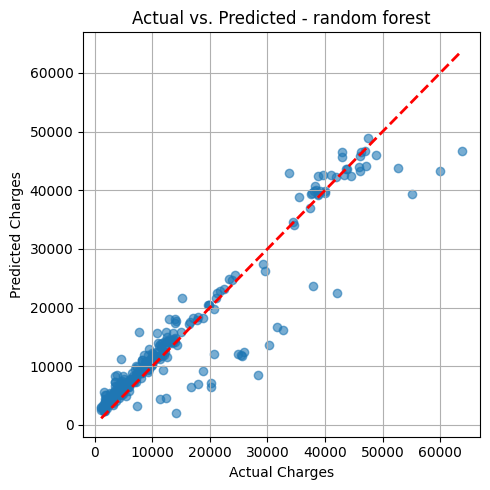

In [112]:
# Scatter plot: Actual values VS Predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.scatter(y_test, xgb_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted - random forest')
plt.grid(True)
plt.tight_layout()
plt.show()

## **XGBoost Regression is best model**

 This model is bestfor predicting values the unseen values for this health insurance data other than all regression models. I got the Accuracy is 88% and this is greater than all other models, MAE and RMSE got less than other models.

### 1. Importance of this Proposal in today's World:    
Accurate prediction of health insurance costs is vital for both insurers and customers. It helps companies set fair premiums, manage risk, and offer personalized plans, while ensuring customers receive reasonable pricing based on their individual or family risk factors.

### 2. Gap in Knowledge & Future Use:
Traditional methods may miss complex patterns, but machine learning can identify intricate relationships in the data, improving predictions. This approach can also be applied to other insurance types like life, car, or property, enhancing pricing accuracy across industries.

### 3. Patterns & Features Impacting ML Model:
Important features include age, BMI, smoking status, number of children, region, and gender. These factors influence insurance premiums and will be analyzed to identify key patterns that improve the model’s accuracy.

## Data Analysis Apporach

1. **Approach to Prove or Disprove Hypothesis:**

  I will apply machine learning models (e.g., Linear Regression, Decision Trees, Random Forest) to analyze the relationship between features and health insurance costs, evaluating model performance to test the hypothesis.

2. **Feature Engineering Techniques:**

  Encoding Categorical Variables (e.g., one-hot encoding).

  Scaling Numerical Features (e.g., standardizing age, BMI).


## Machine Learning Approach

1. **Method Used:**
   We used multiple regression-based machine learning algorithms to predict health insurance costs. The four models implemented are:

      *          Linear Regression

      *          Decision Tree Regressor

      *          Random Forest Regressor

      *           XGBoost Regressor

    These models were selected to compare simple, tree-based, and ensemble-based learning methods.
